<a href="https://colab.research.google.com/github/Y-Srivaishnavi/ais2101_int_sys/blob/main/assignment5/CS2101_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from pathlib import Path
import scipy, json, csv, time, pytz
from scipy.stats.mstats import zscore
from datetime import datetime,tzinfo

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
!pip install scikit-optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import make_scorer

In [ ]:
params = {
    'C':[0.001,0.01,0.05,1,10,30],
    'kernel':['linear', 'rbf'],
    'degree':[1,2,3,4,5],
    'gamma':['scale', 'auto'],
    'coef0':[0, 0.001, 0.01, 0.1],
    'tol':[0.001, 0.005, 0.01],
    'class_weight':[None, 'balanced'],
}

scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score, average = 'macro'),
    'recall_score': make_scorer(recall_score, average = 'macro'),
    'f1_score': make_scorer(f1_score, average = 'macro'),
}

svm_grid = GridSearchCV(SVC(), param_grid=params, scoring=scoring, refit='accuracy_score', return_train_score=True, cv=1, n_jobs=-1)
svm_rand = RandomizedSearchCV(SVC(), param_distributions=params, scoring=scoring, refit='accuracy_score', n_jobs=-1)
svm_baye = BayesSearchCV(SVC(), search_spaces=params, scoring='f1_macro')

From [analysis](https://colab.research.google.com/drive/11dsMSSjQmPATyItC2PVNP1K8PKSIWWka#scrollTo=ANPggFz8wLQJ) under the heading `Statlog`, it is clear that data does not have many outliers. Hence we use Standard Scaler.

In [ ]:
train_stat = pd.read_csv('/content/drive/MyDrive/G-project/datasets/statlog+landsat+satellite/sat.trn', sep=' ', header=None)
test_stat = pd.read_csv('/content/drive/MyDrive/G-project/datasets/statlog+landsat+satellite/sat.tst', sep=' ', header=None)

In [ ]:
train_stat[36] = train_stat[36] - 1
train_stat.loc[train_stat[36] == 6, 36] = 5

test_stat[36] = test_stat[36] - 1
test_stat.loc[test_stat[36] == 6, 36] = 5

X_train=train_stat.drop(36, axis=1)
y_train=train_stat[36]

In [ ]:
X_test=test_stat.drop(36, axis=1)
y_test=test_stat[36]

In [ ]:
train_stat.describe()

0            1            2            3            4   \
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000   
mean     69.473957    83.855242    99.322886    82.555581    69.208794   
std      13.649635    22.725079    16.672166    18.695450    13.552423   
min      40.000000    27.000000    56.000000    33.000000    40.000000   
25%      60.000000    71.000000    85.000000    70.000000    60.000000   
50%      68.000000    87.000000   101.000000    83.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   102.000000   

                5            6            7            8            9   ...  \
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000  ...   
mean     83.499436    99.174521    82.480496    68.963472    83.131003  ...   
std      22.811809    16.627583    18.714272    13.497858    22.813312  ...   
min      27.000000    50.000000    29.000000    40.000000    27.000000  ...   
25%      71.000000    85.000000    69.000000    60.000000    71.000000  ...   
50%      85.000000   101.000000    81.000000    67.000000    85.000000  ...   
75%     103.000000   113.000000    92.000000    79.000000   103.000000  ...   
max     137.000000   145.000000   157.000000   104.000000   130.000000  ...   

                27           28           29           30           31  \
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000   
mean     82.673957    69.033145    83.434273    99.183766    82.638106   
std      18.884322    13.533934    22.812090    16.741240    18.939820   
min      34.000000    39.000000    27.000000    50.000000    29.000000   
25%      70.000000    60.000000    71.000000    85.000000    69.000000   
50%      81.000000    68.000000    85.000000   101.000000    81.000000   
75%      92.000000    79.500000   103.000000   113.000000    92.000000   
max     154.000000   104.000000   128.000000   145.000000   157.000000   

                32           33           34           35           36  
count  4435.000000  4435.000000  4435.000000  4435.000000  4435.000000  
mean     68.797069    83.153326    99.061556    82.584442     2.416234  
std      13.437785    22.762684    16.660735    18.895513     1.877846  
min      40.000000    27.000000    50.000000    29.000000     0.000000  
25%      60.000000    71.000000    85.000000    69.000000     1.000000  
50%      67.000000    85.000000   100.000000    81.000000     2.000000  
75%      79.000000   103.000000   113.000000    92.000000     4.000000  
max     104.000000   130.000000   145.000000   157.000000     5.000000  

[8 rows x 37 columns]

In [ ]:
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4435 non-null   int64
 1   1       4435 non-null   int64
 2   2       4435 non-null   int64
 3   3       4435 non-null   int64
 4   4       4435 non-null   int64
 5   5       4435 non-null   int64
 6   6       4435 non-null   int64
 7   7       4435 non-null   int64
 8   8       4435 non-null   int64
 9   9       4435 non-null   int64
 10  10      4435 non-null   int64
 11  11      4435 non-null   int64
 12  12      4435 non-null   int64
 13  13      4435 non-null   int64
 14  14      4435 non-null   int64
 15  15      4435 non-null   int64
 16  16      4435 non-null   int64
 17  17      4435 non-null   int64
 18  18      4435 non-null   int64
 19  19      4435 non-null   int64
 20  20      4435 non-null   int64
 21  21      4435 non-null   int64
 22  22      4435 non-null   int64
 23  23      4435 

# EDA

In [ ]:
full_data = pd.concat([X_train, X_test], axis=0)
full_data.columns = [f'Feature_{i}' for i in range(full_data.shape[1])]

print("Data Description:\n", full_data.describe())
print("Missing Values:\n", full_data.isnull().sum())

Data Description:
          Feature_0    Feature_1    Feature_2    Feature_3    Feature_4  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     69.400000    83.594872    99.290598    82.592696    69.150272   
std      13.605871    22.882234    16.645944    18.897674    13.561197   
min      39.000000    27.000000    53.000000    33.000000    39.000000   
25%      60.000000    71.000000    85.000000    69.000000    60.000000   
50%      68.000000    87.000000   101.000000    81.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   104.000000   

         Feature_5    Feature_6    Feature_7    Feature_8    Feature_9  ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     83.243512    99.110645    82.497125    68.912354    82.893085  ...   
std      22.886495    16.664088    18.940923    13.470599    22.862255  ...  

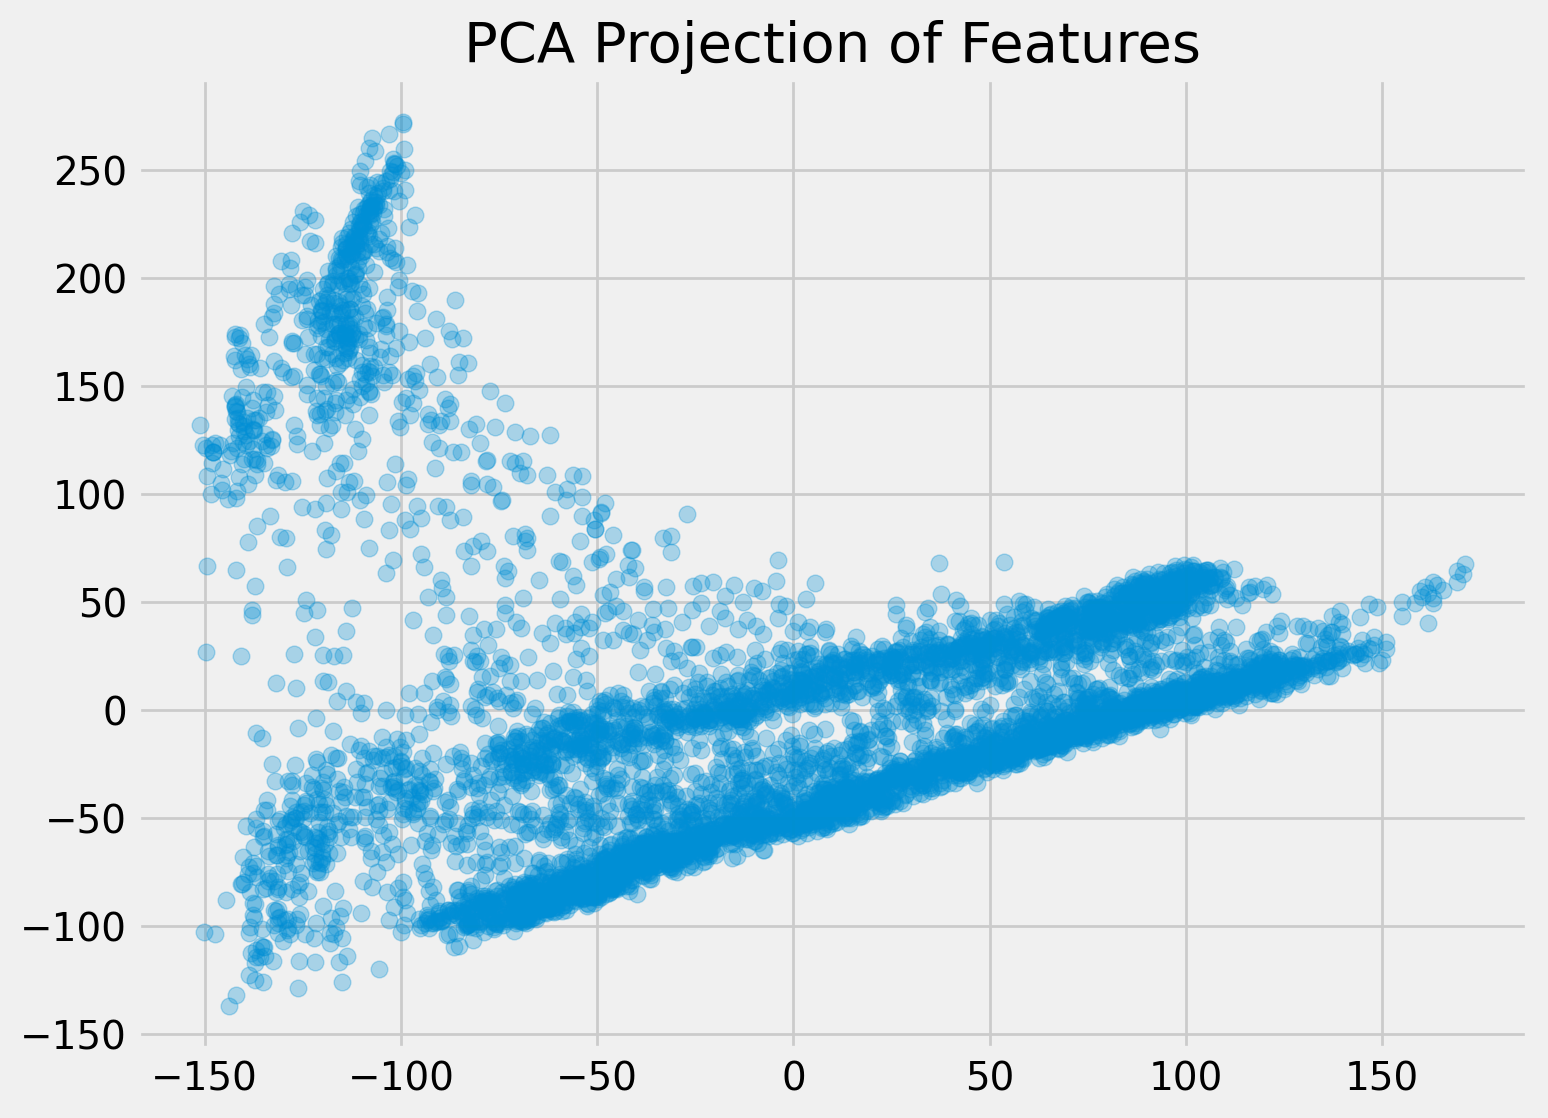

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(full_data)
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3)
plt.title('PCA Projection of Features')
plt.show()

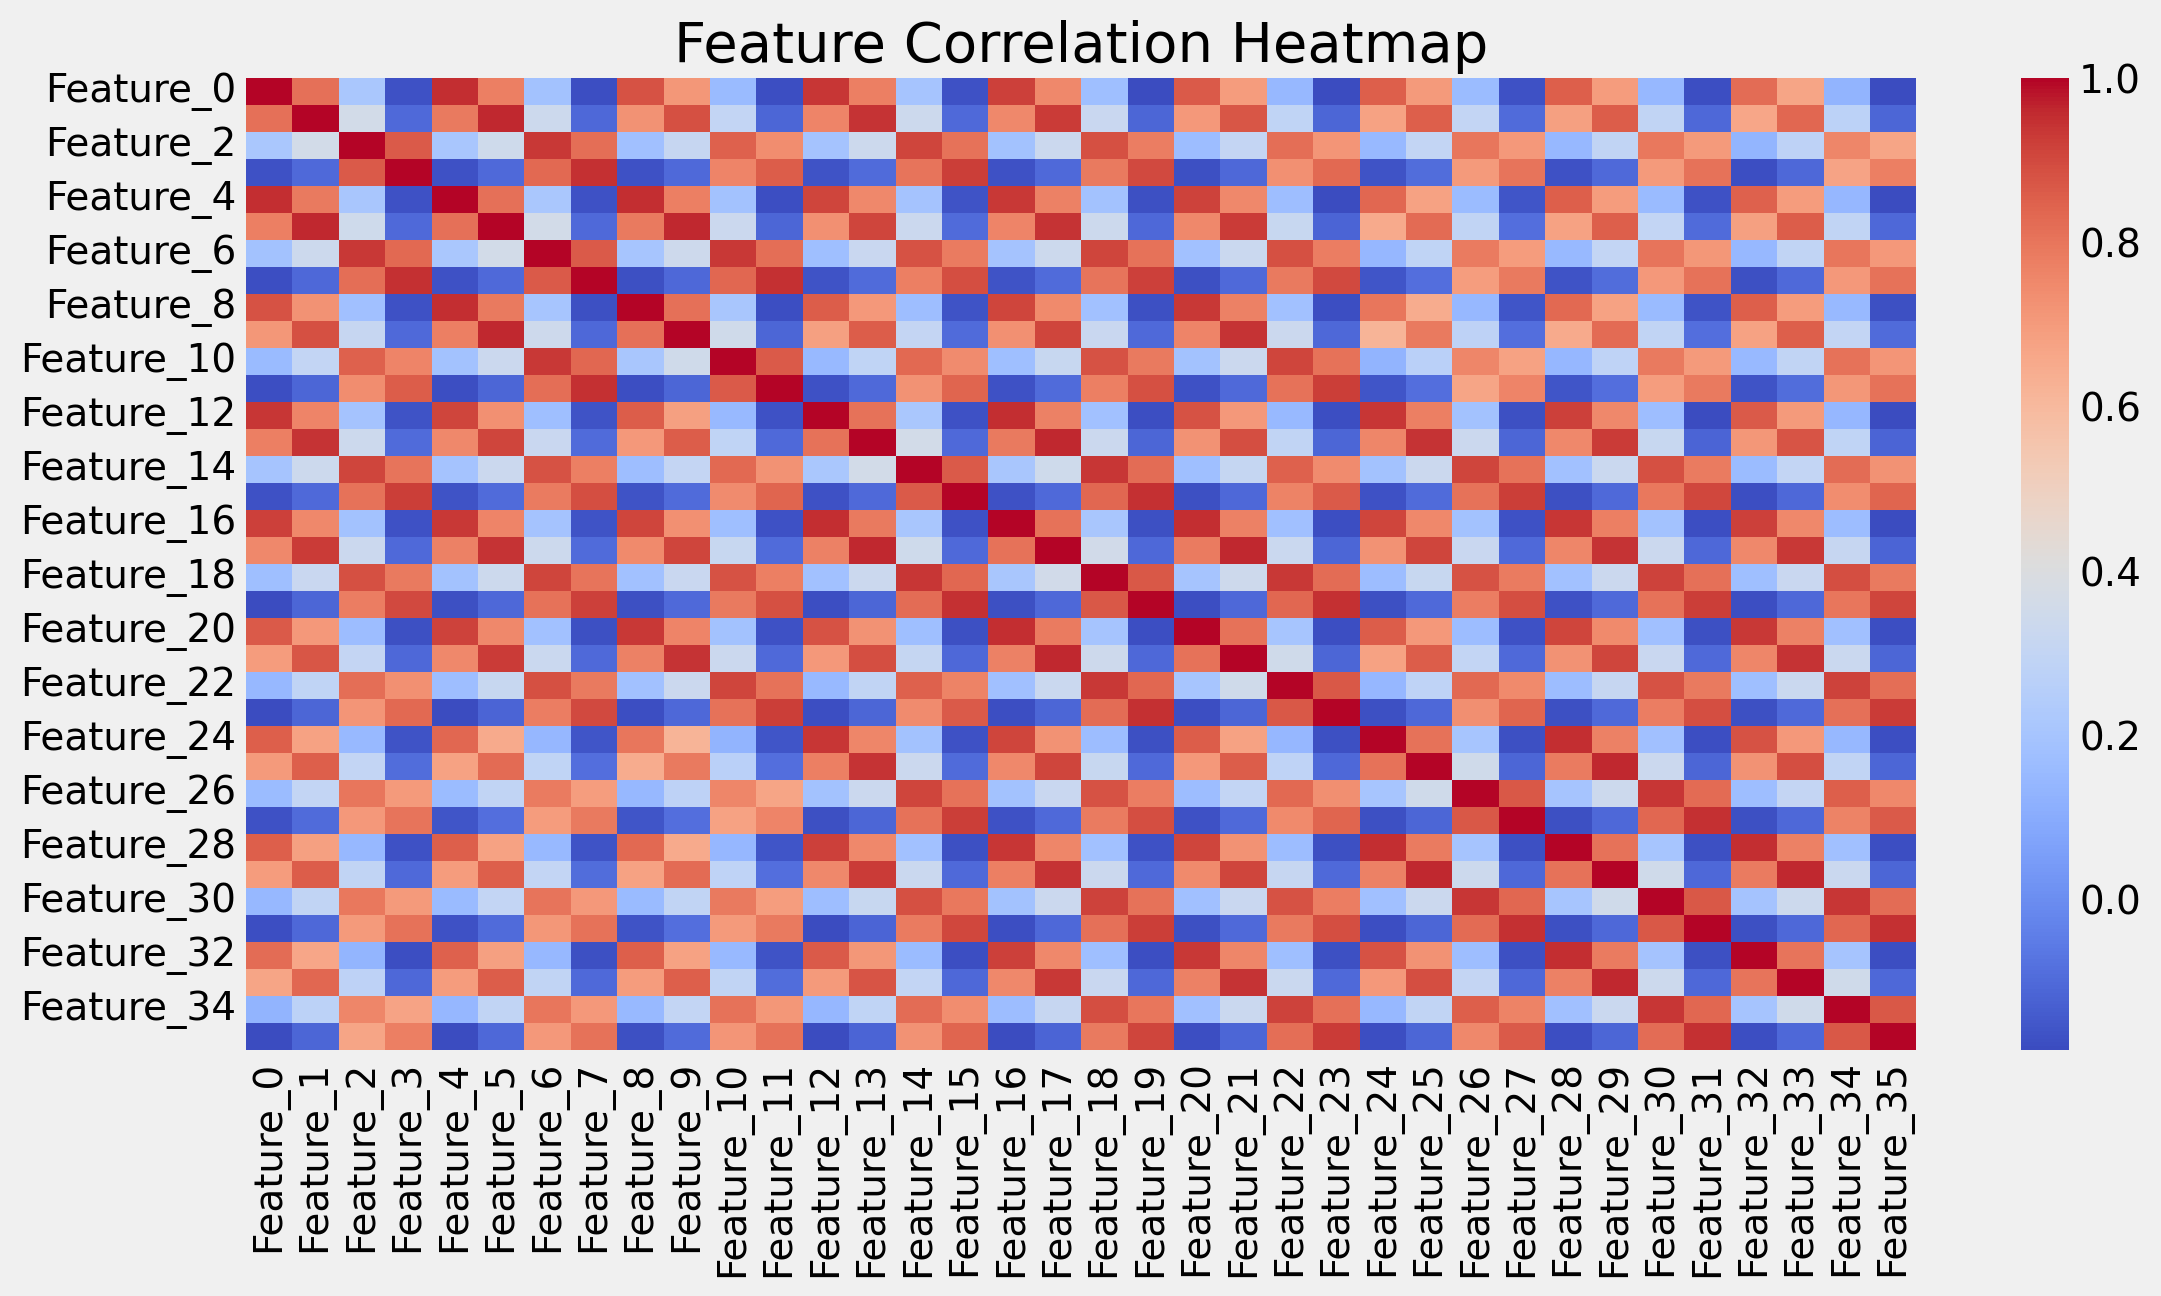

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(full_data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

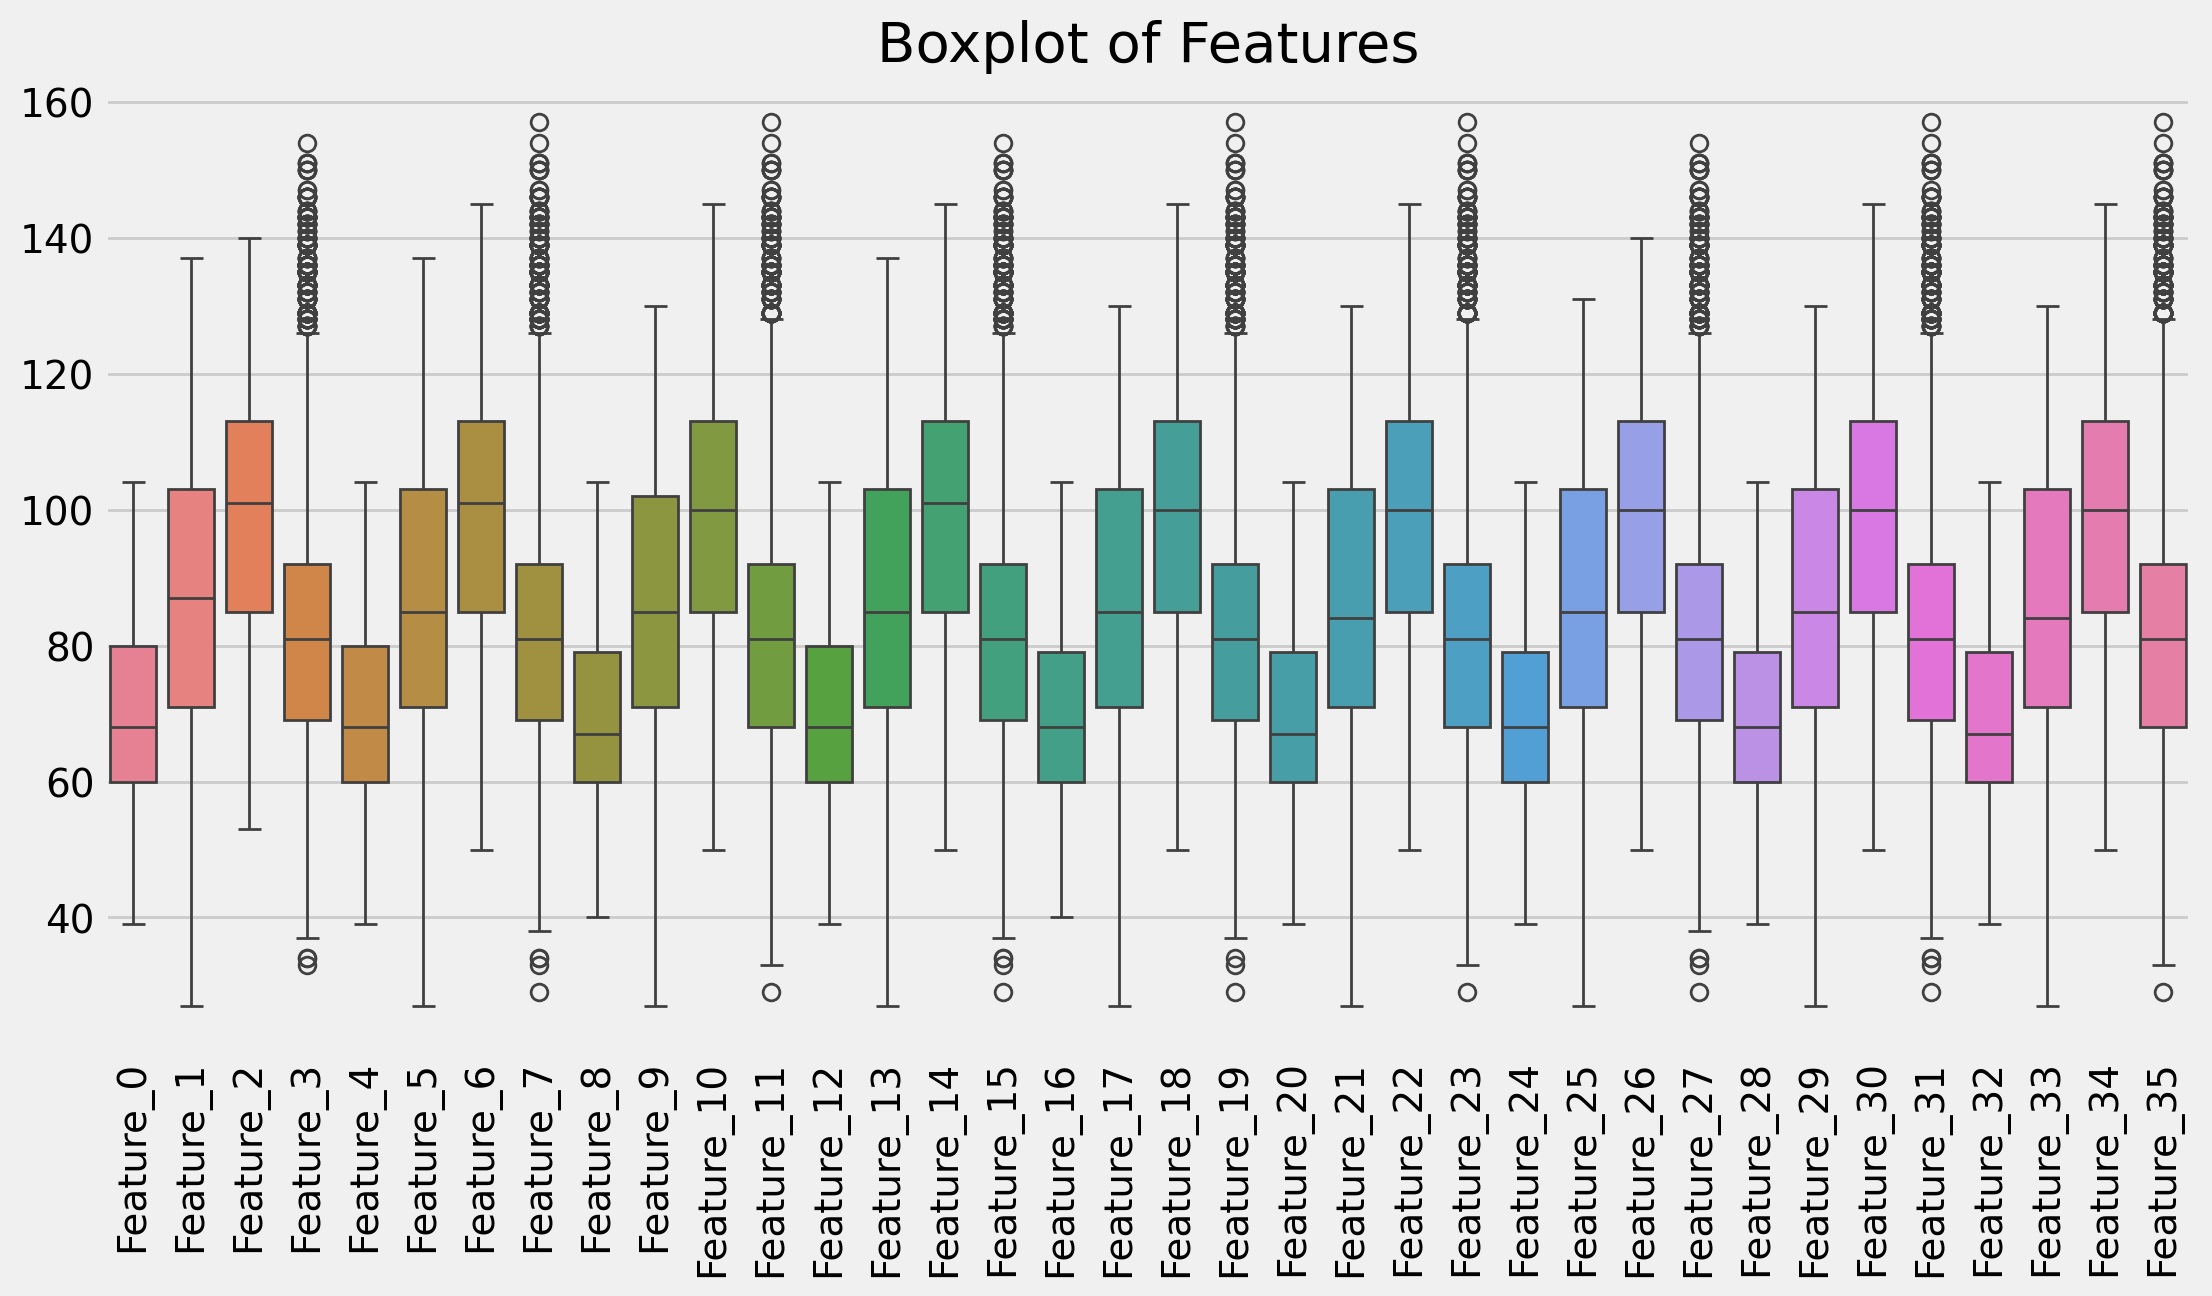

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

In [ ]:
ss_stat = StandardScaler()
X_train = pd.DataFrame(ss_stat.fit_transform(X_train))
X_test = pd.DataFrame(ss_stat.transform(X_test))

# Unsupervised Learning

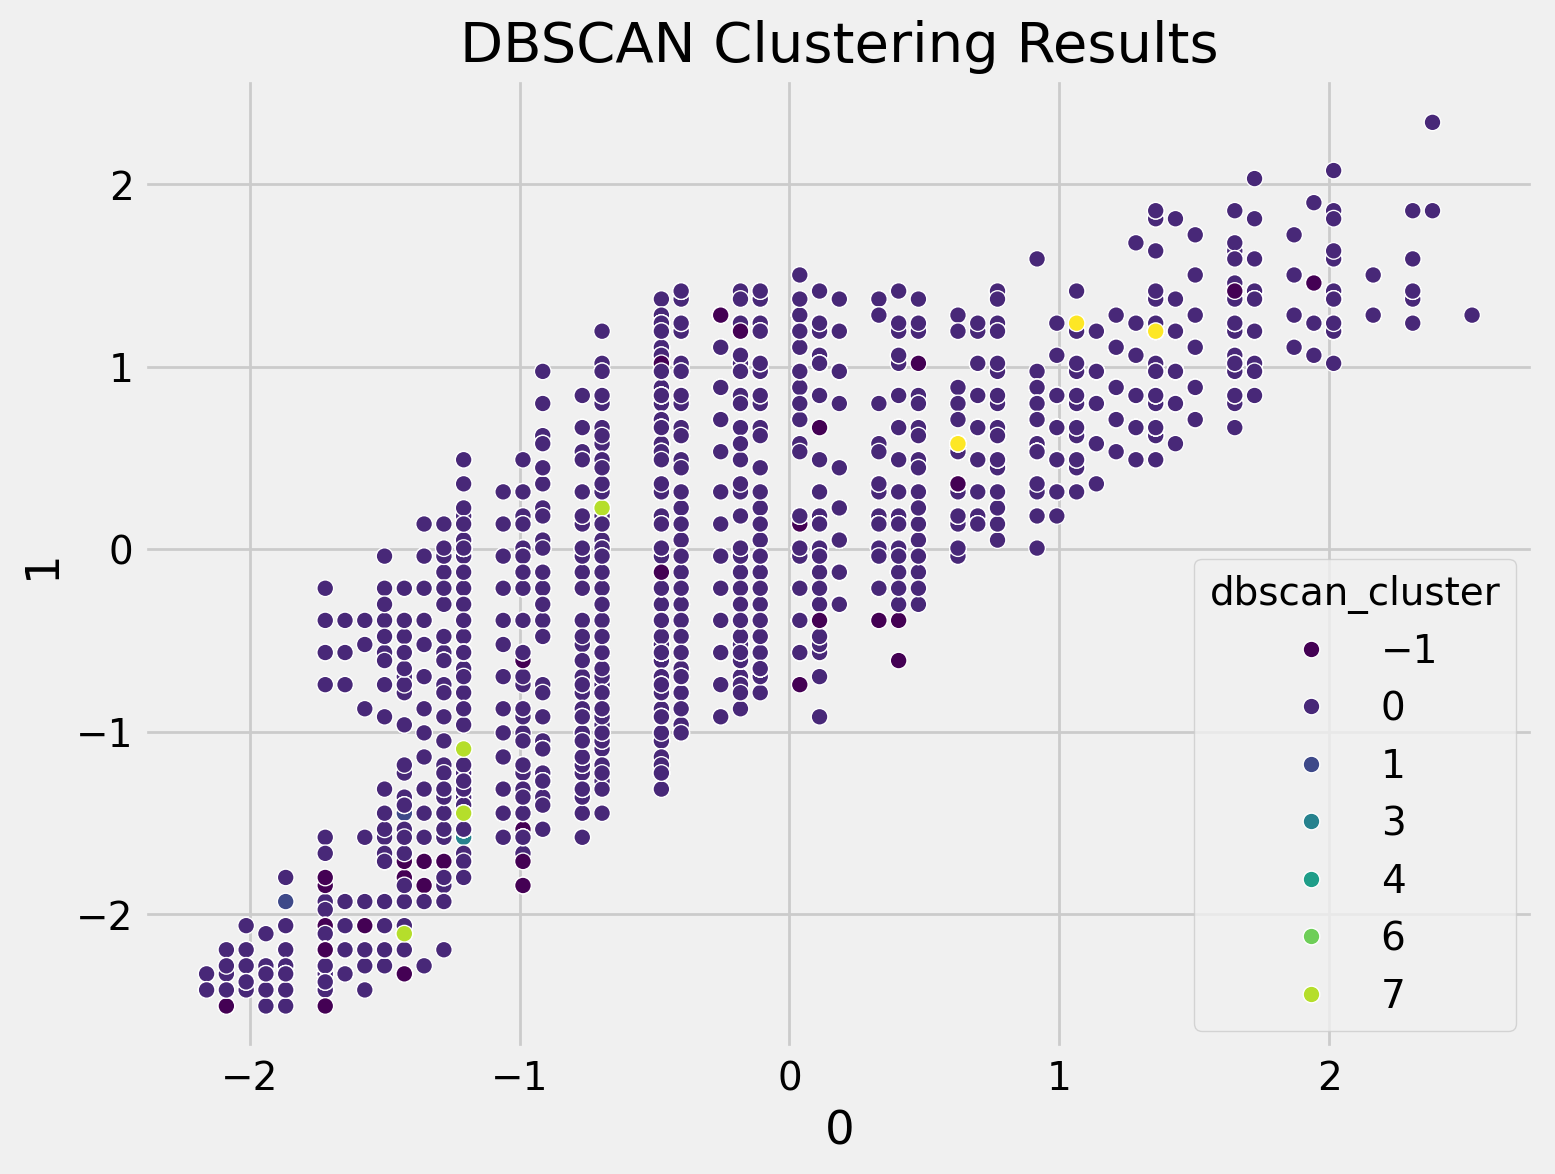

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_train)

train_data = pd.DataFrame(X_train)
feature_columns = [f'{i}' for i in range(36)]
train_data['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='dbscan_cluster', palette='viridis', data=train_data)
plt.title('DBSCAN Clustering Results')
plt.show()

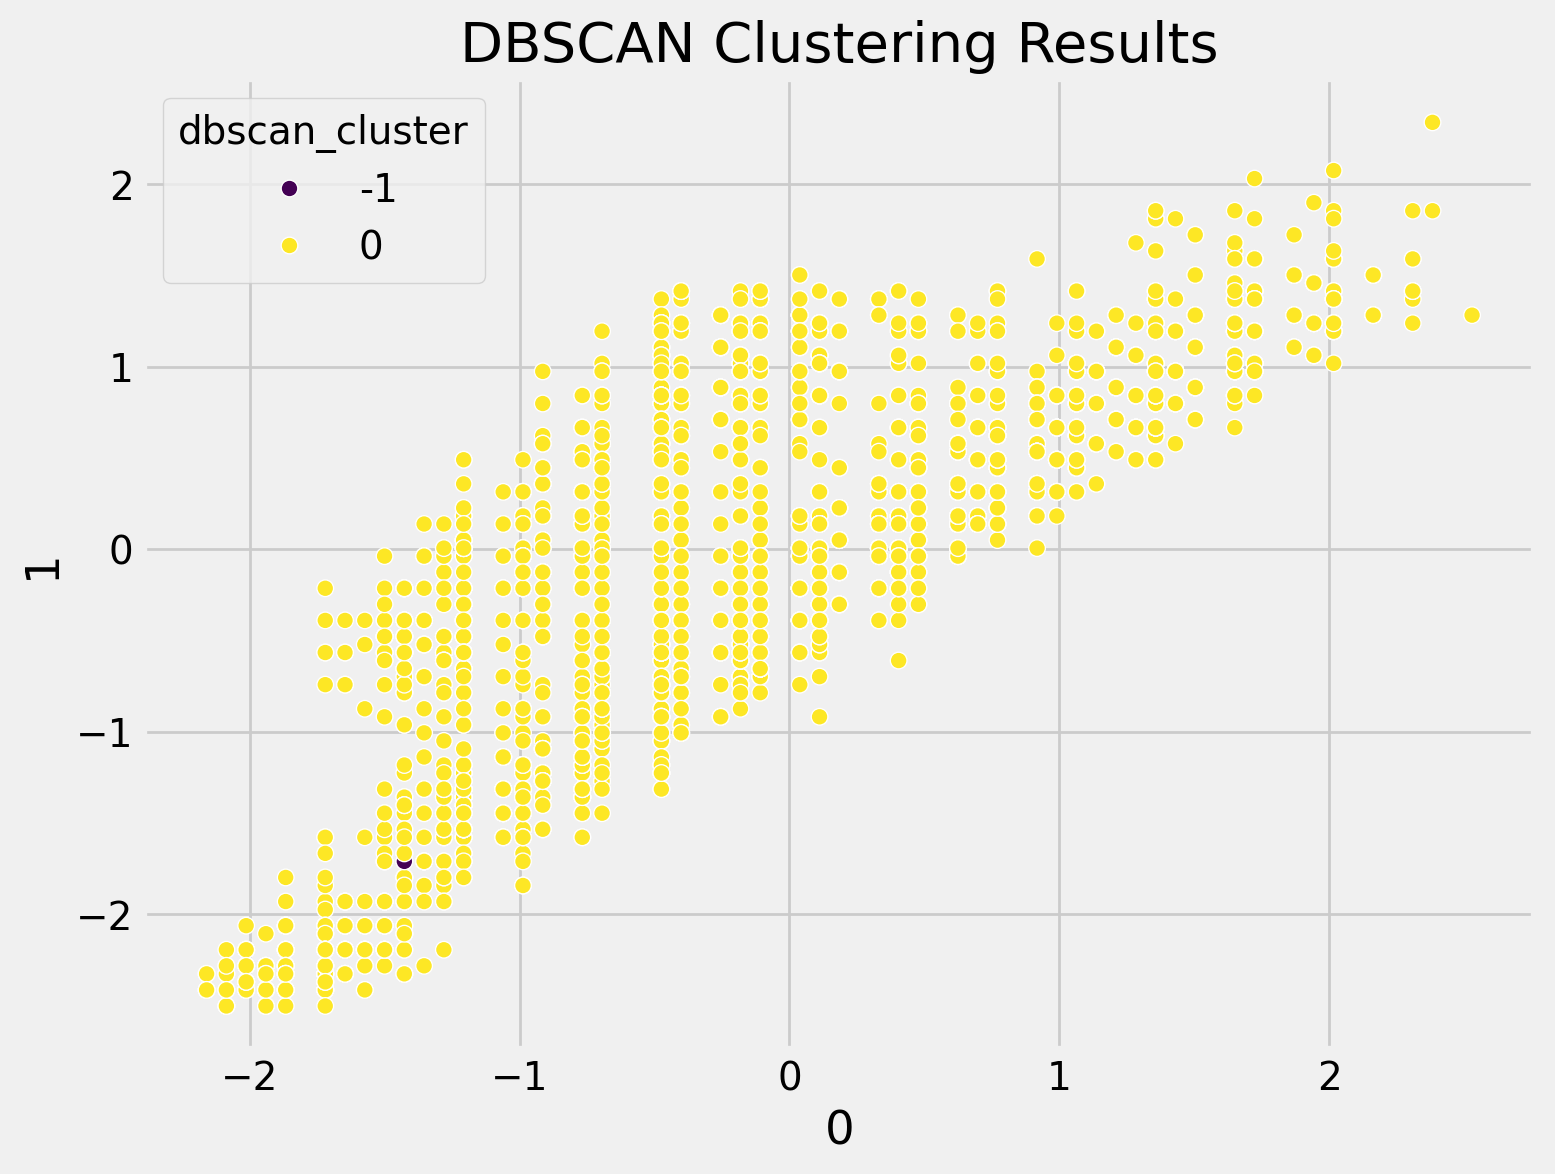

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=3.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_train)

train_data = pd.DataFrame(X_train)
feature_columns = [f'{i}' for i in range(36)]
train_data['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='dbscan_cluster', palette='viridis', data=train_data)
plt.title('DBSCAN Clustering Results')
plt.show()

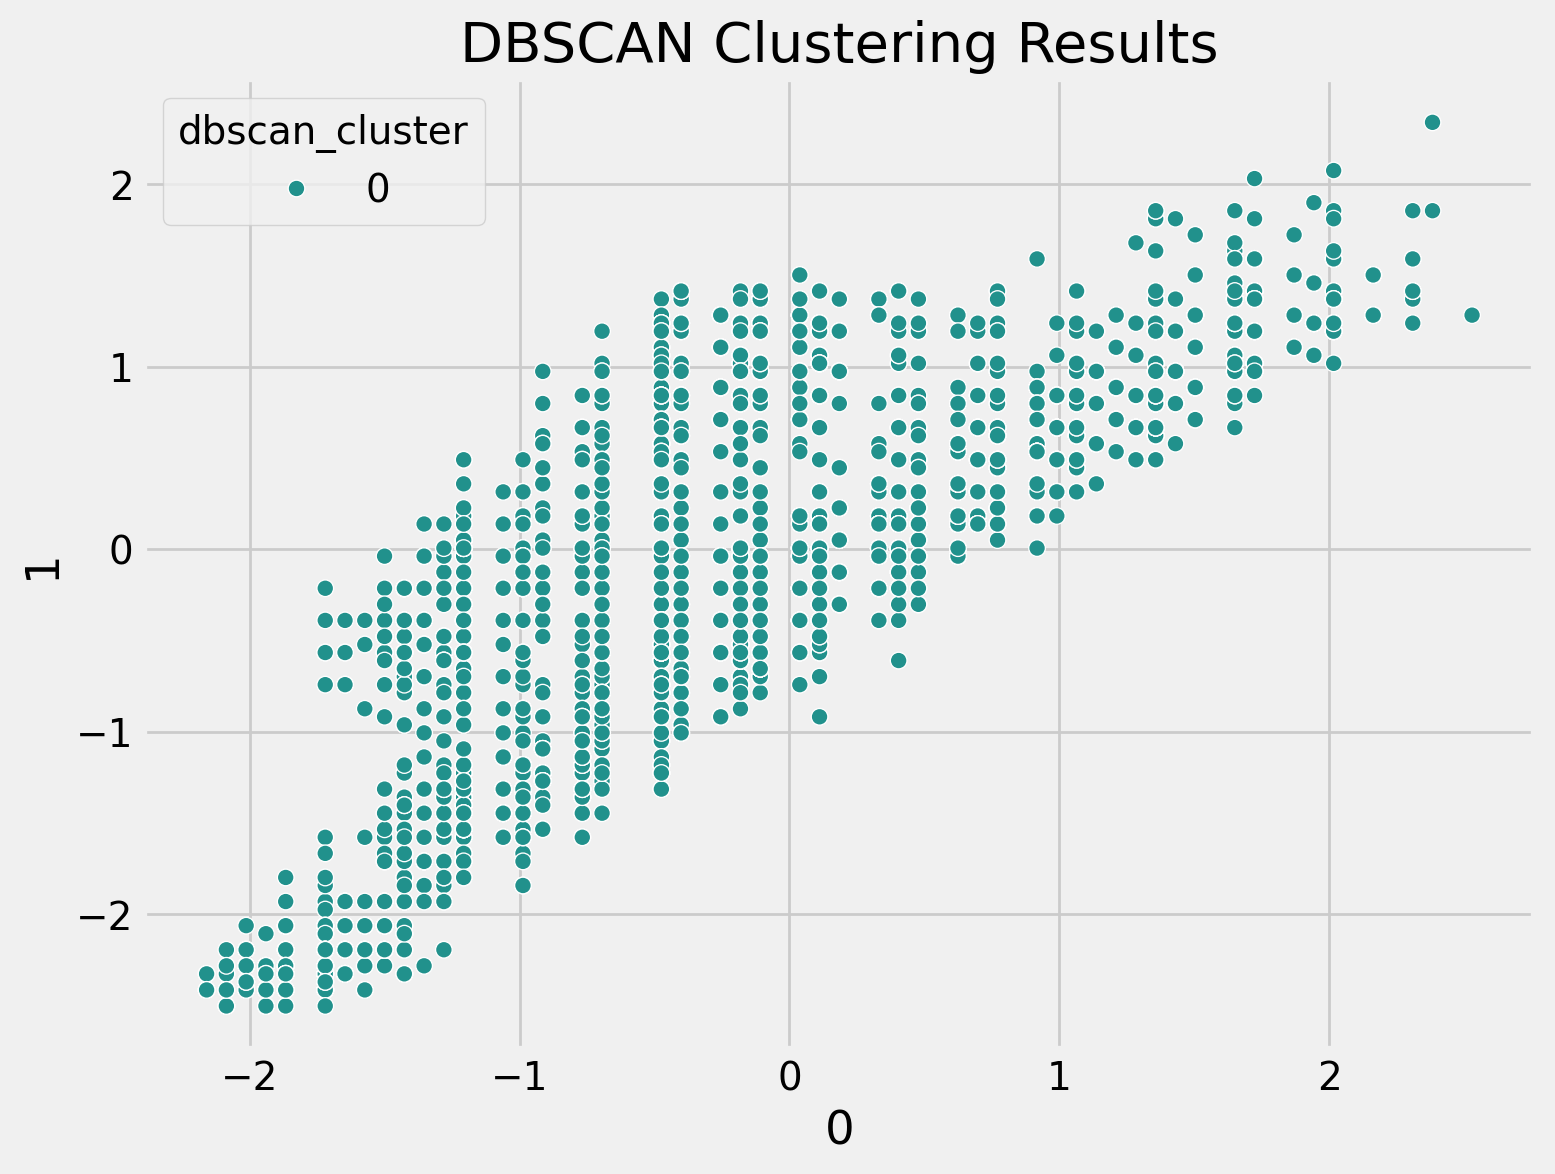

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_train)

train_data = pd.DataFrame(X_train)
feature_columns = [f'{i}' for i in range(36)]
train_data['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='dbscan_cluster', palette='viridis', data=train_data)
plt.title('DBSCAN Clustering Results')
plt.show()

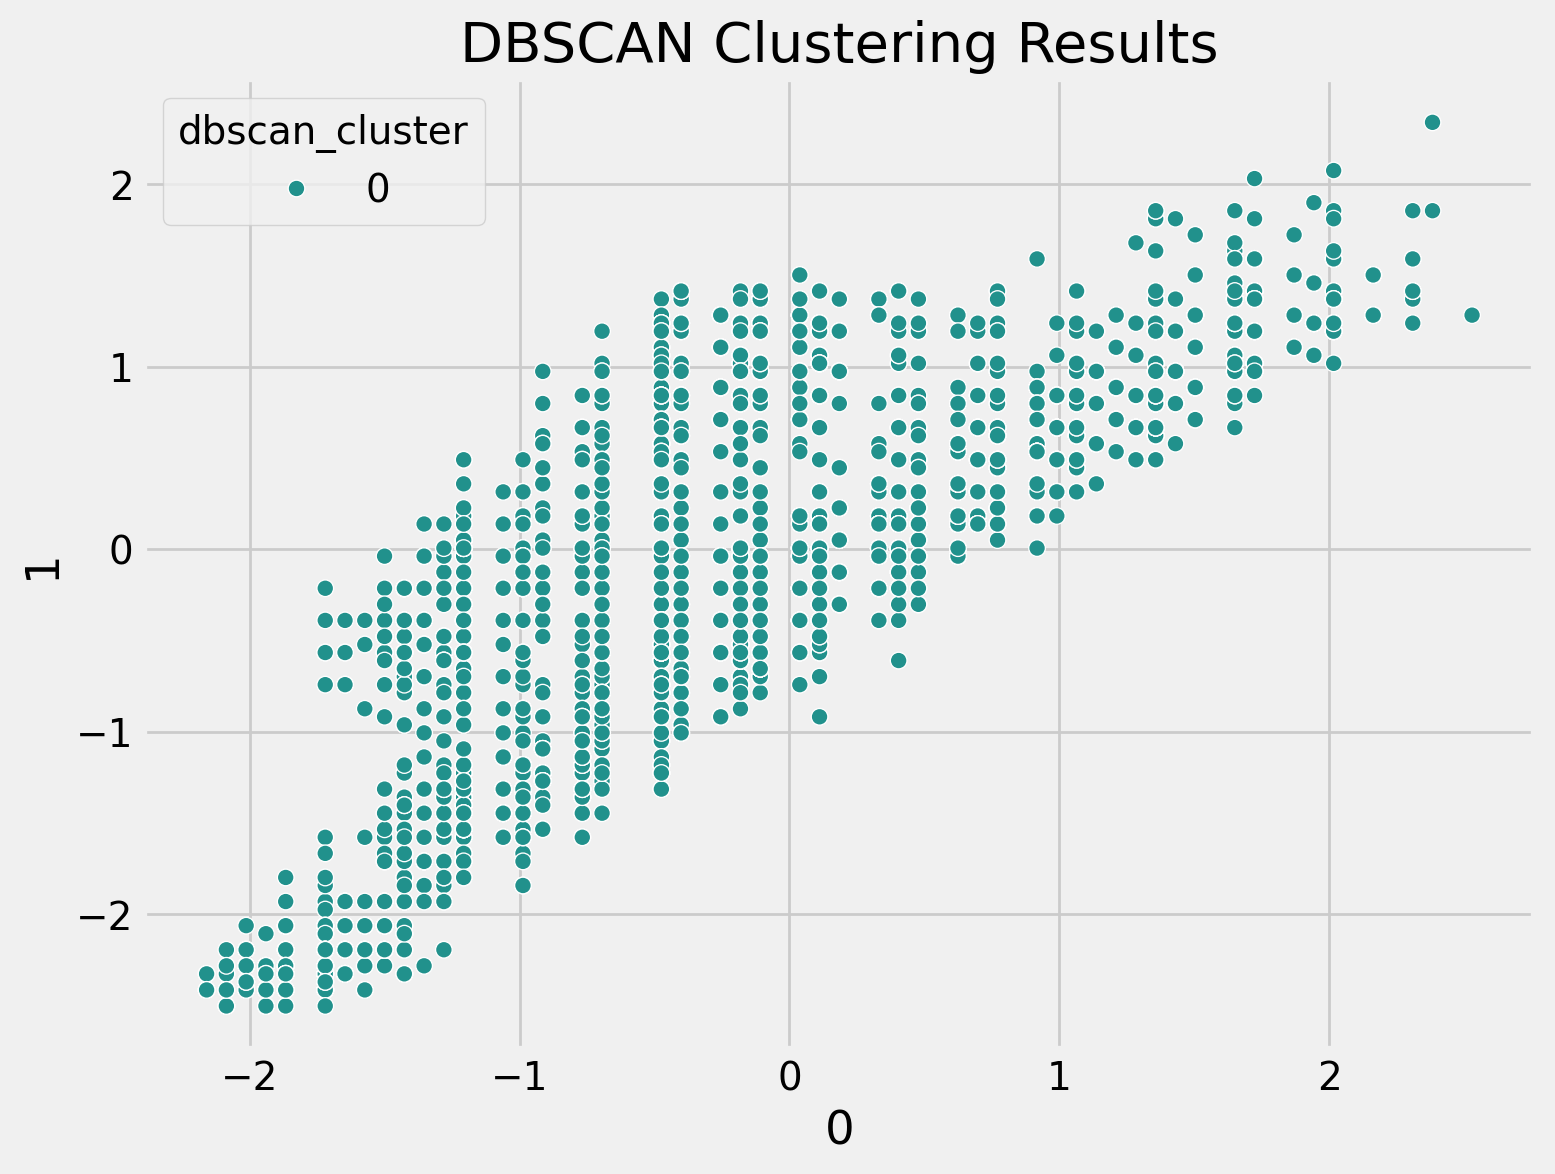

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=5, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_train)

train_data = pd.DataFrame(X_train)
feature_columns = [f'{i}' for i in range(36)]
train_data['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='dbscan_cluster', palette='viridis', data=train_data)
plt.title('DBSCAN Clustering Results')
plt.show()

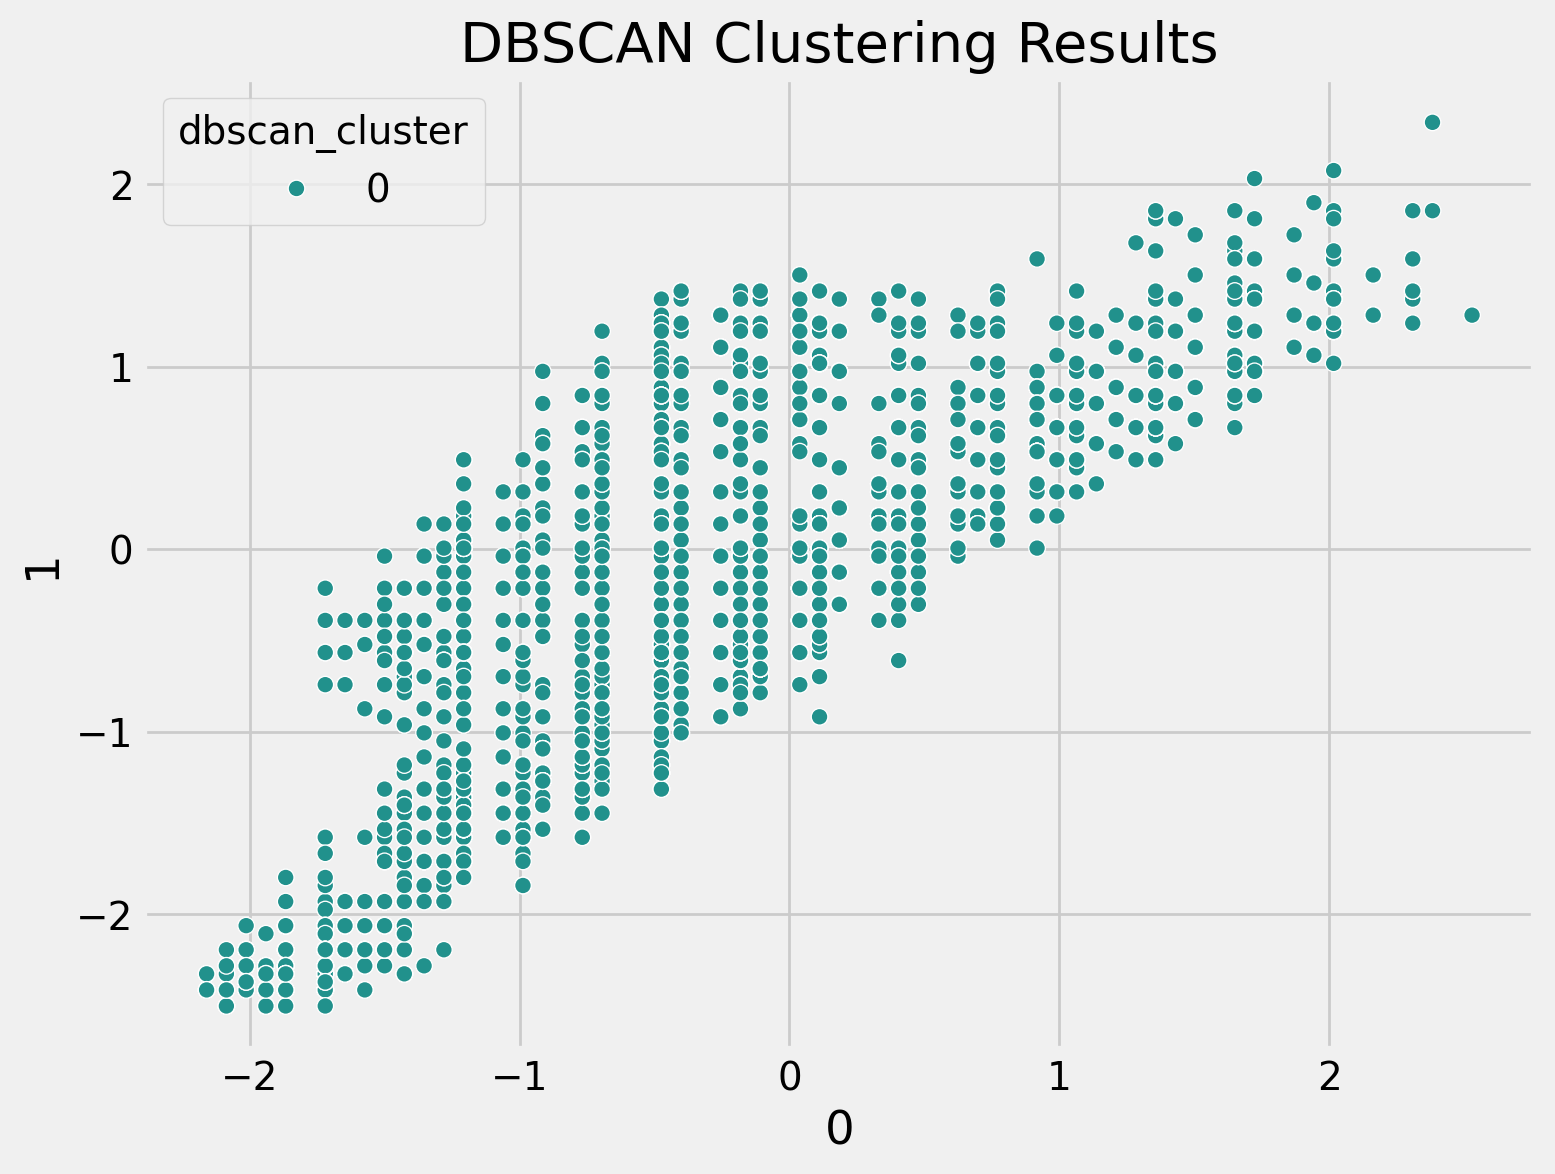

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=10, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_train)

train_data = pd.DataFrame(X_train)
feature_columns = [f'{i}' for i in range(36)]
train_data['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='dbscan_cluster', palette='viridis', data=train_data)
plt.title('DBSCAN Clustering Results')
plt.show()

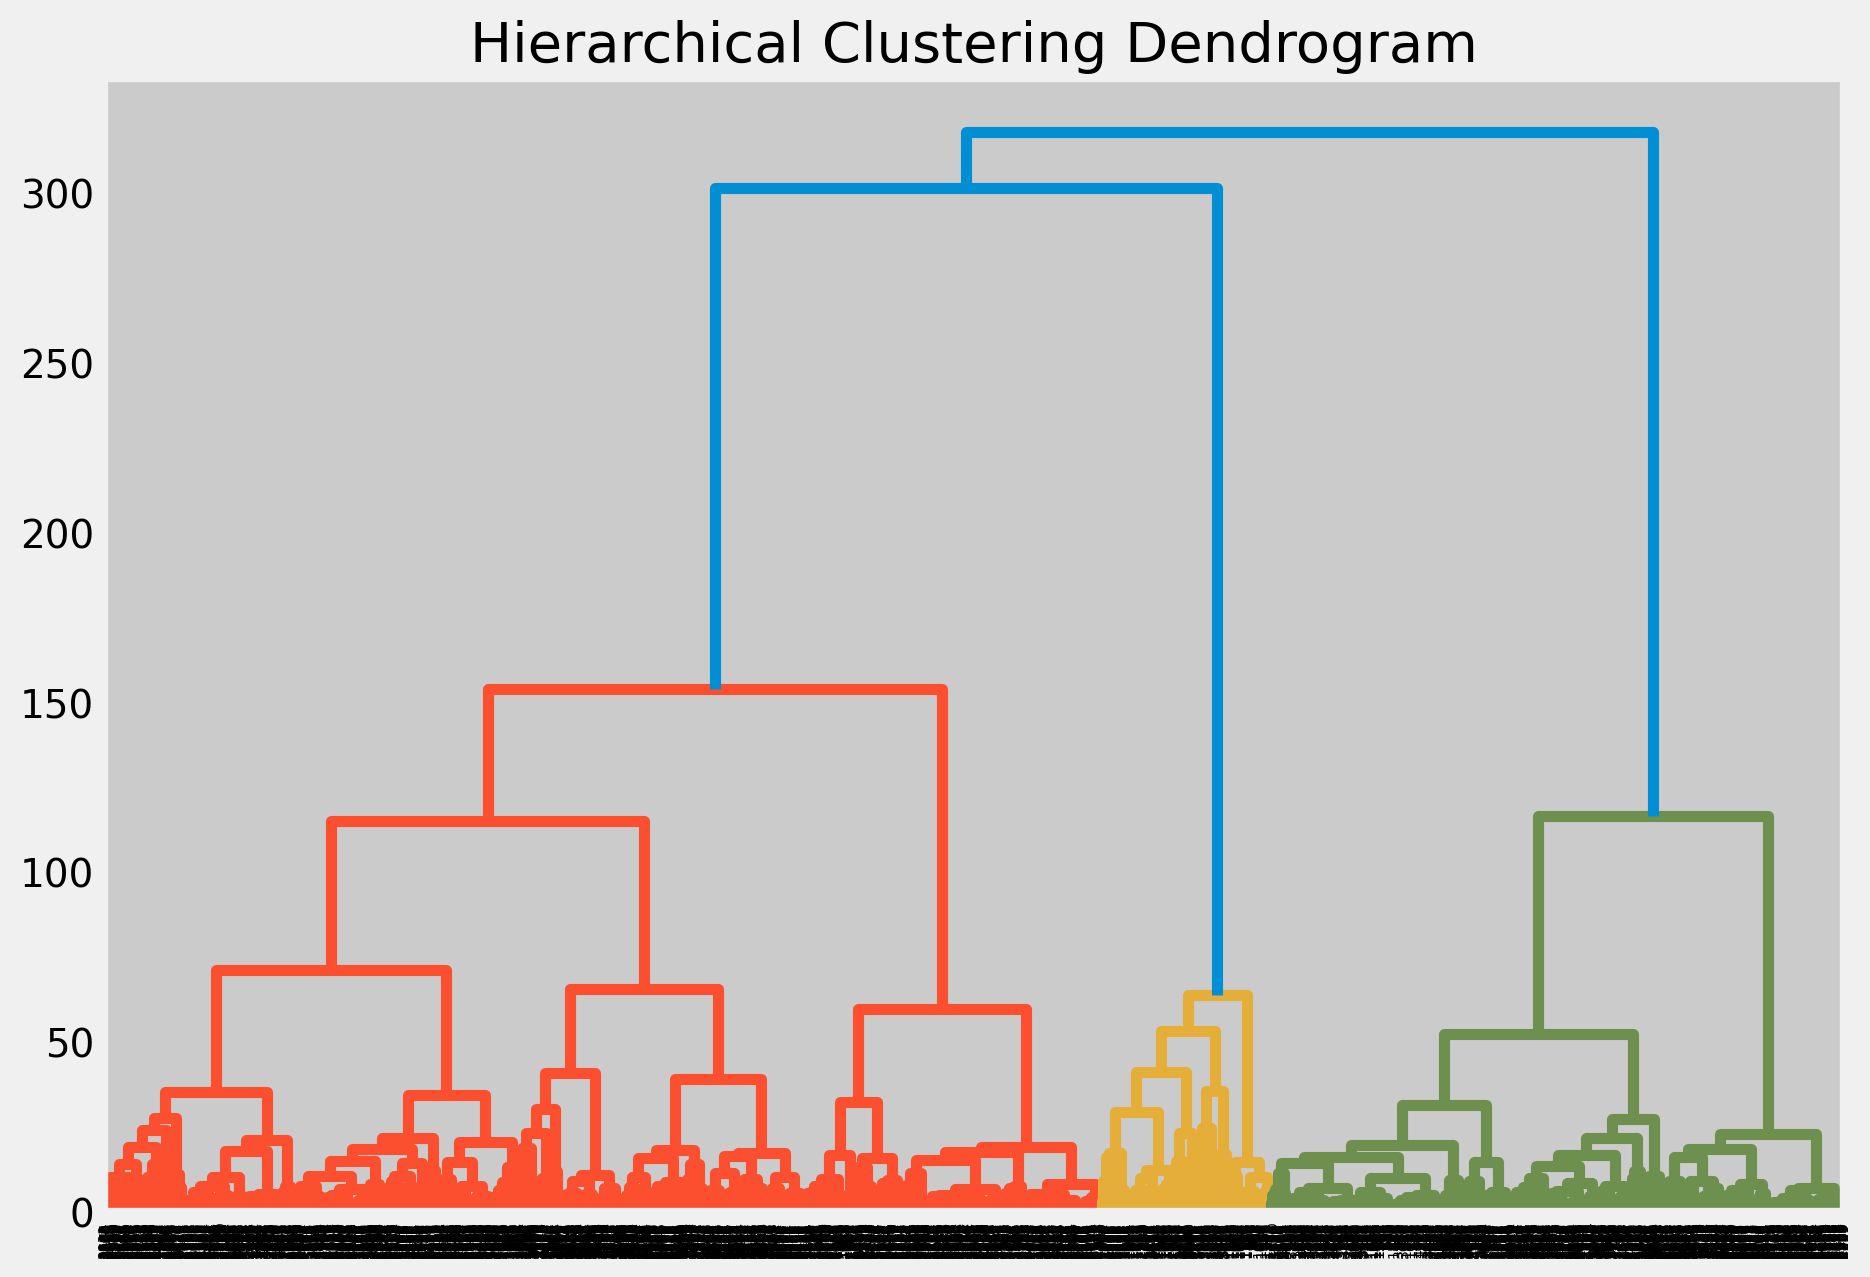

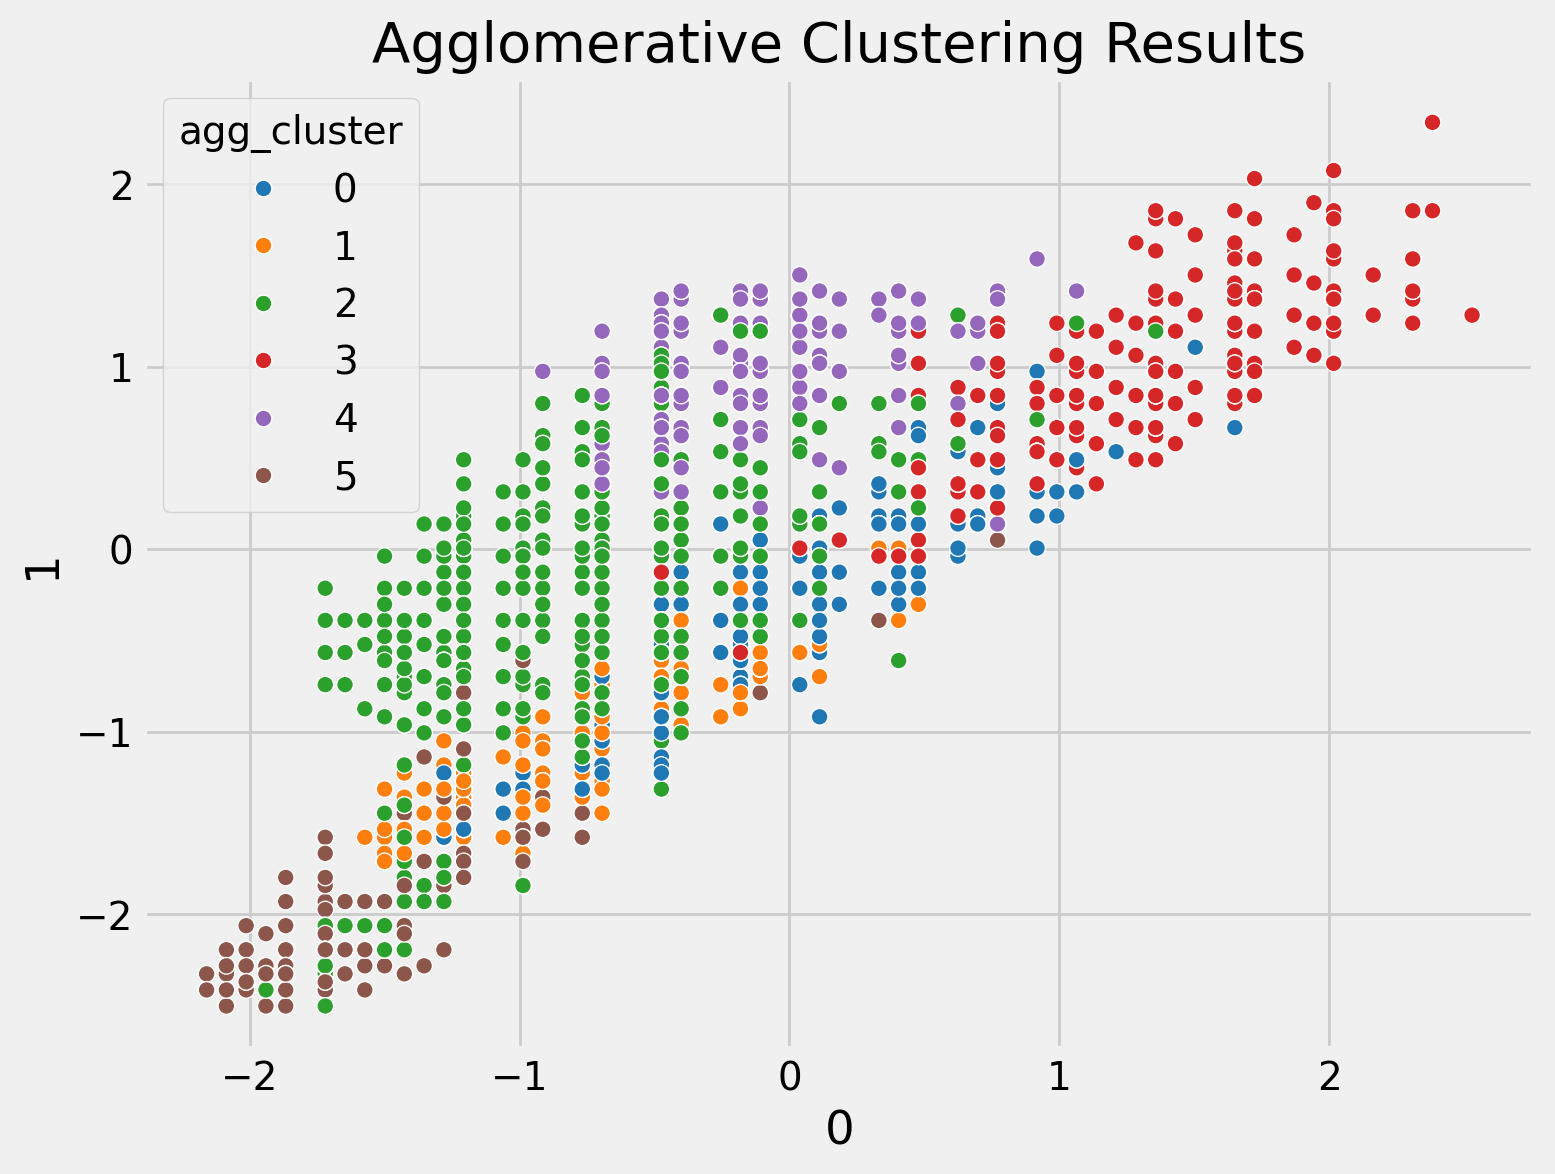

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_train, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

print()

agg_clustering = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_train)
train_data['agg_cluster'] = agg_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, hue='agg_cluster', palette='tab10', data=train_data)
plt.title('Agglomerative Clustering Results')
plt.show()

In [ ]:
print(train_data['dbscan_cluster'].value_counts())

dbscan_cluster
-1    4435
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score

dbscan_core_samples = train_data[train_data['dbscan_cluster'] != -1]
dbscan_sil_score = silhouette_score(
    dbscan_core_samples[list(range(36))],
    dbscan_core_samples['dbscan_cluster']
)
print(f'DBSCAN Silhouette Score: {dbscan_sil_score:.4f}')


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

DBSCAN seems unable to differentiate between noise and data instances.

In [ ]:
agg_sil_score = silhouette_score(X_train, train_data['agg_cluster'])
print(f'Agglomerative Clustering Silhouette Score: {agg_sil_score:.4f}')


Agglomerative Clustering Silhouette Score: 0.3041


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
train_data.columns = train_data.columns.astype(str)
train_data['kmeans_cluster'] = kmeans.fit_predict(train_data)

kmeans_sil_score = silhouette_score(
    X_train,
    train_data['kmeans_cluster']
)

print("K-Means Silhouette Score:", kmeans_sil_score)

K-Means Silhouette Score: 0.3479901803684987


# SVM

### Without Cross-validation

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

results = {
    'None': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'),
             recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')]
}

In [ ]:
print(f"Classification report: ",
      classification_report(y_test, y_pred))

Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       461
           1       0.96      0.97      0.97       224
           2       0.87      0.96      0.92       397
           3       0.72      0.58      0.64       211
           4       0.93      0.86      0.89       237
           5       0.85      0.86      0.86       470

    accuracy                           0.90      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.89      0.90      0.89      2000



### Random Search CV

In [ ]:
for _ in range(5):
  svm_rand.fit(X_train, y_train)
  rand_pred = svm_rand.predict(X_test)
  rand_accuracy = svm_rand.score(X_test, y_test)

  print(f"Accuracy: {rand_accuracy} ",
        "Classification report: ",
        classification_report(y_test, rand_pred),
        f"Best parameters: {svm_rand.best_params_}")

  results['Random'] = [accuracy_score(y_test, rand_pred), precision_score(y_test, rand_pred, average='macro'),
                      recall_score(y_test, rand_pred, average='macro'), f1_score(y_test, rand_pred, average='macro')]

Accuracy: 0.84  Classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97       461
           1       0.97      0.91      0.94       224
           2       0.86      0.95      0.90       397
           3       0.53      0.36      0.43       211
           4       0.83      0.71      0.76       237
           5       0.76      0.84      0.80       470

    accuracy                           0.84      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.83      0.84      0.83      2000
 Best parameters: {'tol': 0.001, 'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'coef0': 0.1, 'class_weight': None, 'C': 0.01}
Accuracy: 0.9055  Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       461
           1       0.97      0.96      0.97       224
           2       0.88      0.95      0.91       397
           3       0.76      

### Baye Search CV

In [ ]:
for _ in range(5):
  svm_baye.fit(X_train, y_train)
  baye_pred = svm_baye.predict(X_test)
  baye_accuracy = svm_baye.score(X_test, y_test)

  print(f"Accuracy: {baye_accuracy} ",
        "Classification report: ",
        classification_report(y_test, baye_pred),
        f"Best parameters: {svm_baye.best_params_}")

  results['Bayes'] = [accuracy_score(y_test, baye_pred), precision_score(y_test, baye_pred, average='macro'),
                      recall_score(y_test, baye_pred, average='macro'), f1_score(y_test, baye_pred, average='macro')]

Accuracy: 0.8917666849814293  Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.97      0.96      0.97       224
           2       0.88      0.95      0.91       397
           3       0.76      0.65      0.70       211
           4       0.91      0.91      0.91       237
           5       0.88      0.86      0.87       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.90      2000
 Best parameters: OrderedDict([('C', 30.0), ('class_weight', None), ('coef0', 0.01), ('degree', 3), ('gamma', 'auto'), ('kernel', 'rbf'), ('tol', 0.01)])
Accuracy: 0.8917666849814293  Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       0.97      0.96      0.97       224
           2       0.88      0.95

### Grid Search CV

In [ ]:
svm_grid = GridSearchCV(SVC(), param_grid=params, scoring=scoring, refit='accuracy_score', return_train_score=True, cv=2, n_jobs=-1)

In [ ]:
for _ in range(3):
  svm_grid.fit(X_train, y_train)
  grid_pred = svm_grid.predict(X_test)
  grid_accuracy = svm_grid.score(X_test, y_test)

  print(f"Accuracy: {grid_accuracy} ",
        "Classification report: ",
        classification_report(y_test, grid_pred),
        f"Best parameters: {svm_grid.best_params_}")

  results['Grid'] = [accuracy_score(y_test, grid_pred), precision_score(y_test, grid_pred, average='macro'),
                    recall_score(y_test, grid_pred, average='macro'), f1_score(y_test, grid_pred, average='macro')]

KeyboardInterrupt: 

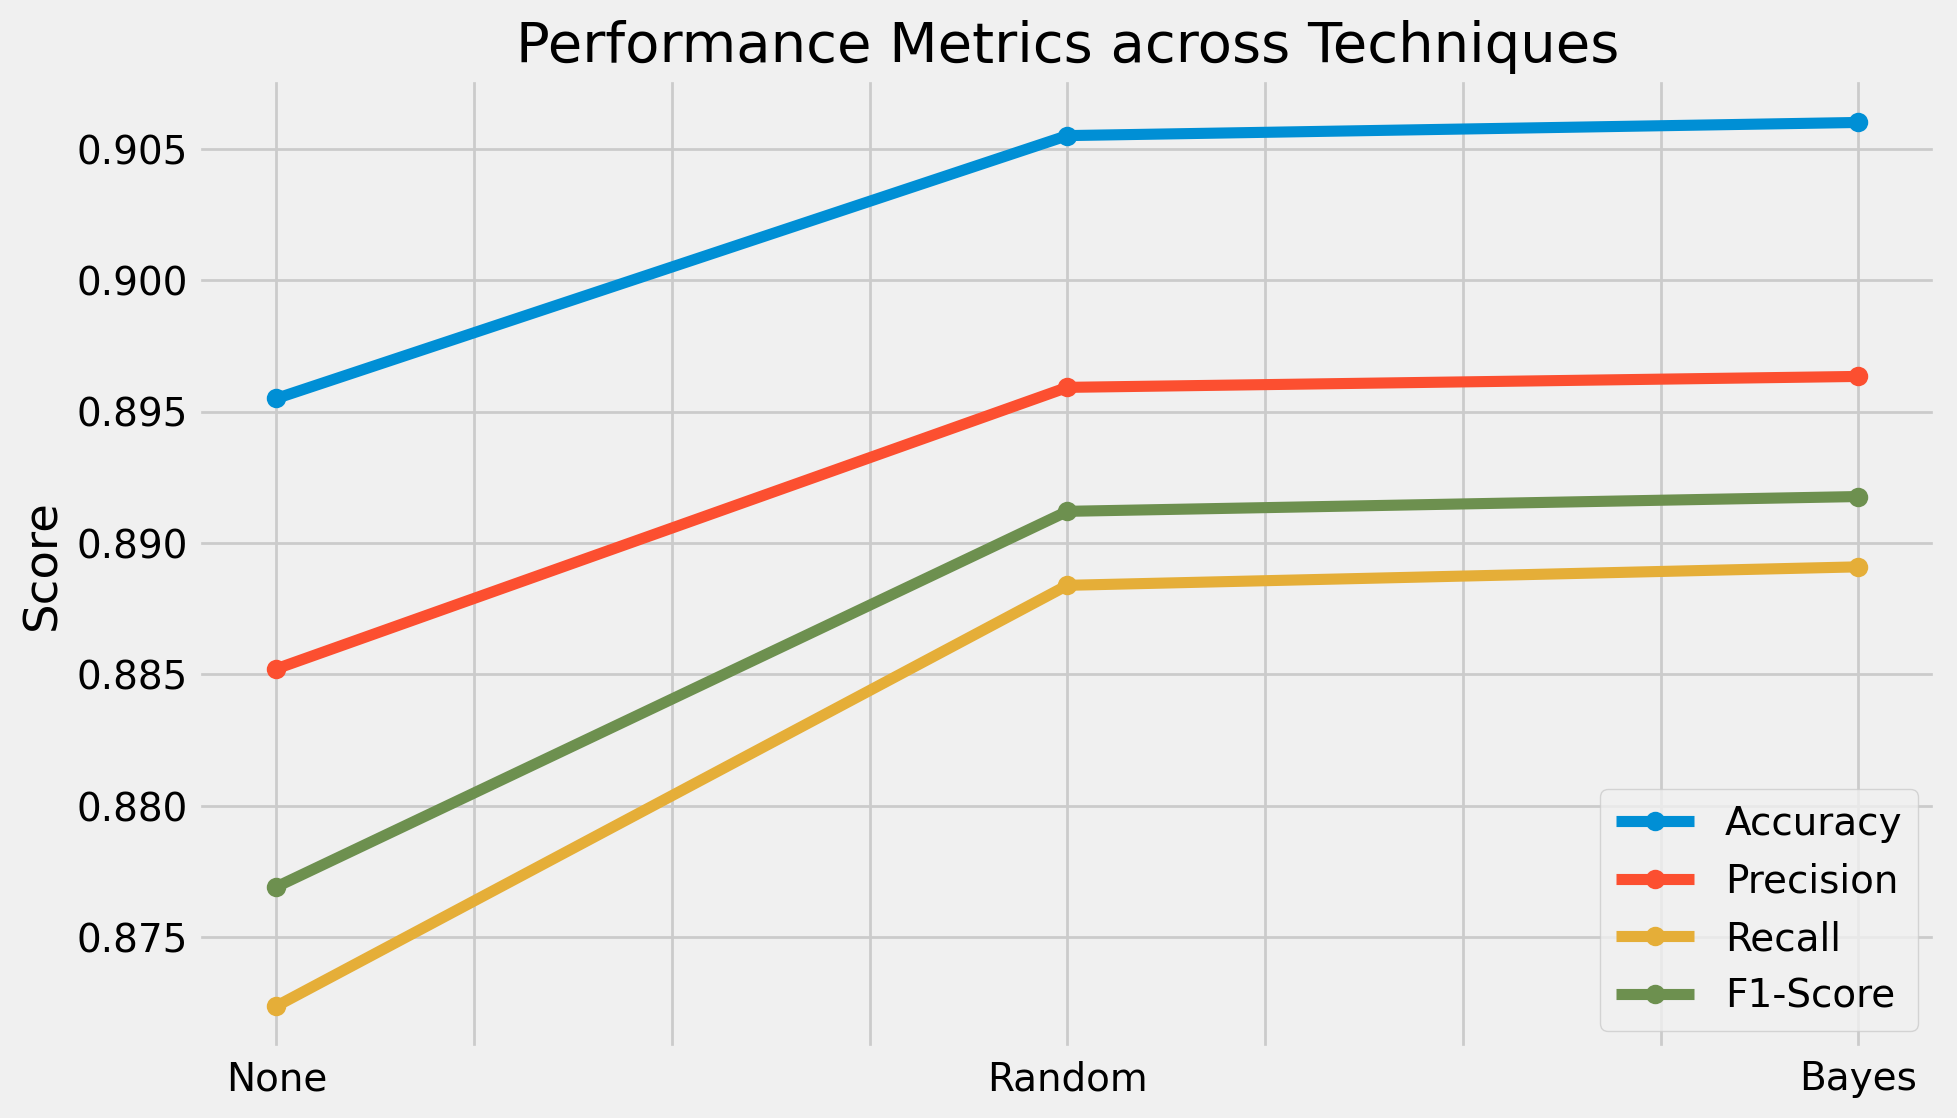

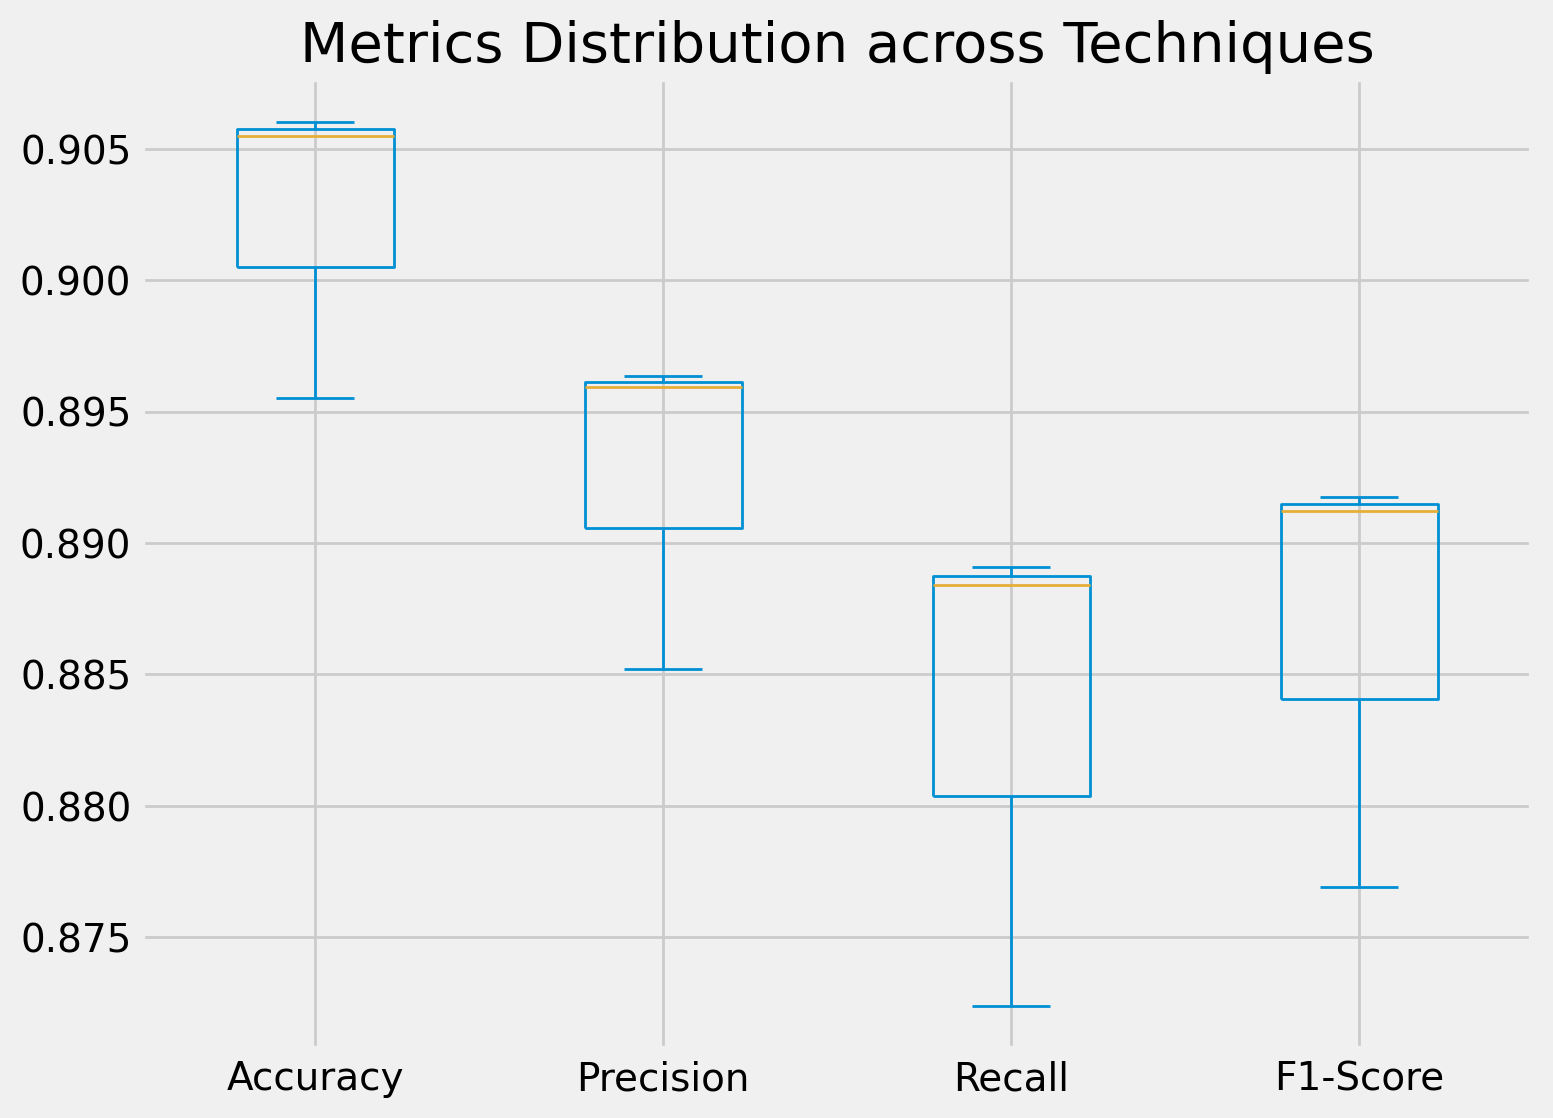

               None    Random     Bayes
Accuracy   0.895500  0.905500  0.906000
Precision  0.885214  0.895921  0.896337
Recall     0.872379  0.888388  0.889092
F1-Score   0.876917  0.891204  0.891767


In [ ]:
#only plots final result of each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results, index=metrics)

results_df.T.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Performance Metrics across Techniques')
plt.ylabel('Score')
plt.grid(True)
plt.show()
print()

results_df.T.plot(kind='box', figsize=(8,6))
plt.title('Metrics Distribution across Techniques')
plt.grid(True)
plt.show()

print(results_df)

# Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_mlp = {
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 150, 200],
    'batch_size': [100, 200, 300],
    'alpha': [0.0001, 0.001, 0.01],
    'early_stopping': [True]
}

In [ ]:
for _ in range(5):
  mlp = MLPClassifier(random_state=42)  #to be able to reproduce result
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)

  print(f"Accuracy: {accuracy_score(y_test, y_pred)} ",
        "Classification report: ",
        classification_report(y_test, y_pred),
        f"Best parameters: {mlp.best_params_}")

  results_mlp = {
      'None': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'),
              recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')]
  }

In [ ]:
mlp_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_mlp, scoring=scoring, refit='accuracy_score', return_train_score=True, cv=2, n_jobs=-1)
mlp_rand = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_mlp, scoring=scoring, refit='accuracy_score', n_jobs=-1)
mlp_baye = BayesSearchCV(MLPClassifier(random_state=42), search_spaces=param_mlp, scoring='f1_macro')

## Random Search

In [ ]:
for _ in range(5):
  mlp_rand.fit(X_train, y_train)
  rand_pred = mlp_rand.predict(X_test)
  rand_accuracy = mlp_rand.score(X_test, y_test)

  print(f"Accuracy: {rand_accuracy} ",
        "Classification report: ",
        classification_report(y_test, rand_pred),
        f"Best parameters: {mlp_rand.best_params_}")

  results_mlp['Random'] = [accuracy_score(y_test, rand_pred), precision_score(y_test, rand_pred, average='macro'),
                      recall_score(y_test, rand_pred, average='macro'), f1_score(y_test, rand_pred, average='macro')]

Accuracy: 0.8895  Classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98       461
           1       0.95      0.97      0.96       224
           2       0.88      0.91      0.89       397
           3       0.67      0.71      0.69       211
           4       0.89      0.86      0.87       237
           5       0.88      0.83      0.86       470

    accuracy                           0.89      2000
   macro avg       0.87      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000
 Best parameters: {'max_iter': 150, 'learning_rate_init': 0.001, 'early_stopping': True, 'batch_size': 100, 'alpha': 0.01}
Accuracy: 0.9035  Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       461
           1       0.98      0.96      0.97       224
           2       0.87      0.96      0.91       397
           3       0.80      0.58 

## Bayes Search

In [ ]:
for _ in range(5):
  mlp_baye.fit(X_train, y_train)
  baye_pred = mlp_baye.predict(X_test)
  baye_accuracy = mlp_baye.score(X_test, y_test)

  print(f"Accuracy: {baye_accuracy} ",
        "Classification report: ",
        classification_report(y_test, baye_pred),
        f"Best parameters: {mlp_baye.best_params_}")

  results_mlp['Bayes'] = [accuracy_score(y_test, baye_pred), precision_score(y_test, baye_pred, average='macro'),
                      recall_score(y_test, baye_pred, average='macro'), f1_score(y_test, baye_pred, average='macro')]

Accuracy: 0.8759498096246251  Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       461
           1       0.97      0.96      0.96       224
           2       0.85      0.97      0.91       397
           3       0.78      0.58      0.66       211
           4       0.88      0.89      0.88       237
           5       0.85      0.85      0.85       470

    accuracy                           0.89      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000
 Best parameters: OrderedDict([('alpha', 0.0001), ('batch_size', 200), ('early_stopping', True), ('learning_rate_init', 0.01), ('max_iter', 100)])
Accuracy: 0.8759498096246251  Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       461
           1       0.97      0.96      0.96       224
           2       0.85      0.97      0

## Grid Search

In [ ]:
for _ in range(5):
  mlp_grid.fit(X_train, y_train)
  grid_pred = mlp_grid.predict(X_test)
  grid_accuracy = mlp_grid.score(X_test, y_test)

  print(f"Accuracy: {grid_accuracy} ",
        "Classification report: ",
        classification_report(y_test, grid_pred),
        f"Best parameters: {mlp_grid.best_params_}")

  results_mlp['Grid'] = [accuracy_score(y_test, grid_pred), precision_score(y_test, grid_pred, average='macro'),
                      recall_score(y_test, grid_pred, average='macro'), f1_score(y_test, grid_pred, average='macro')]

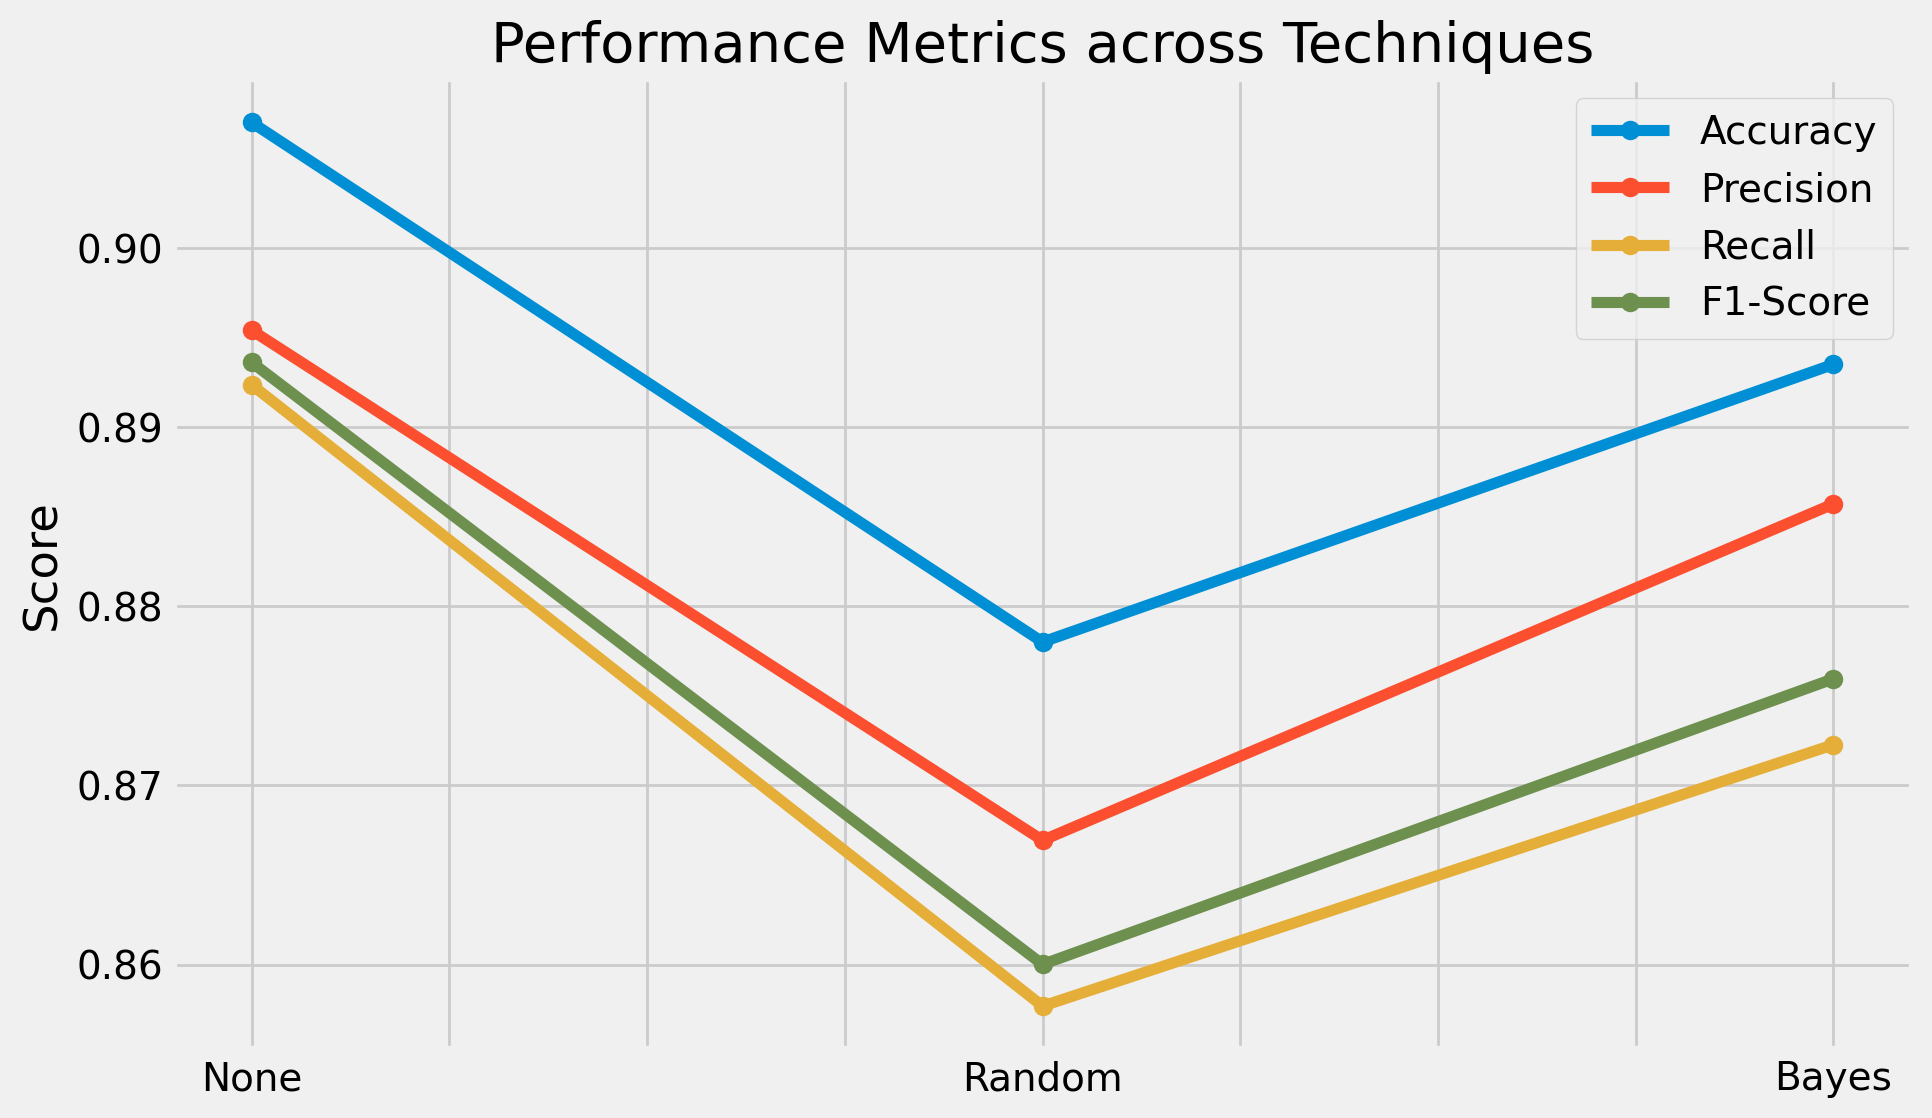

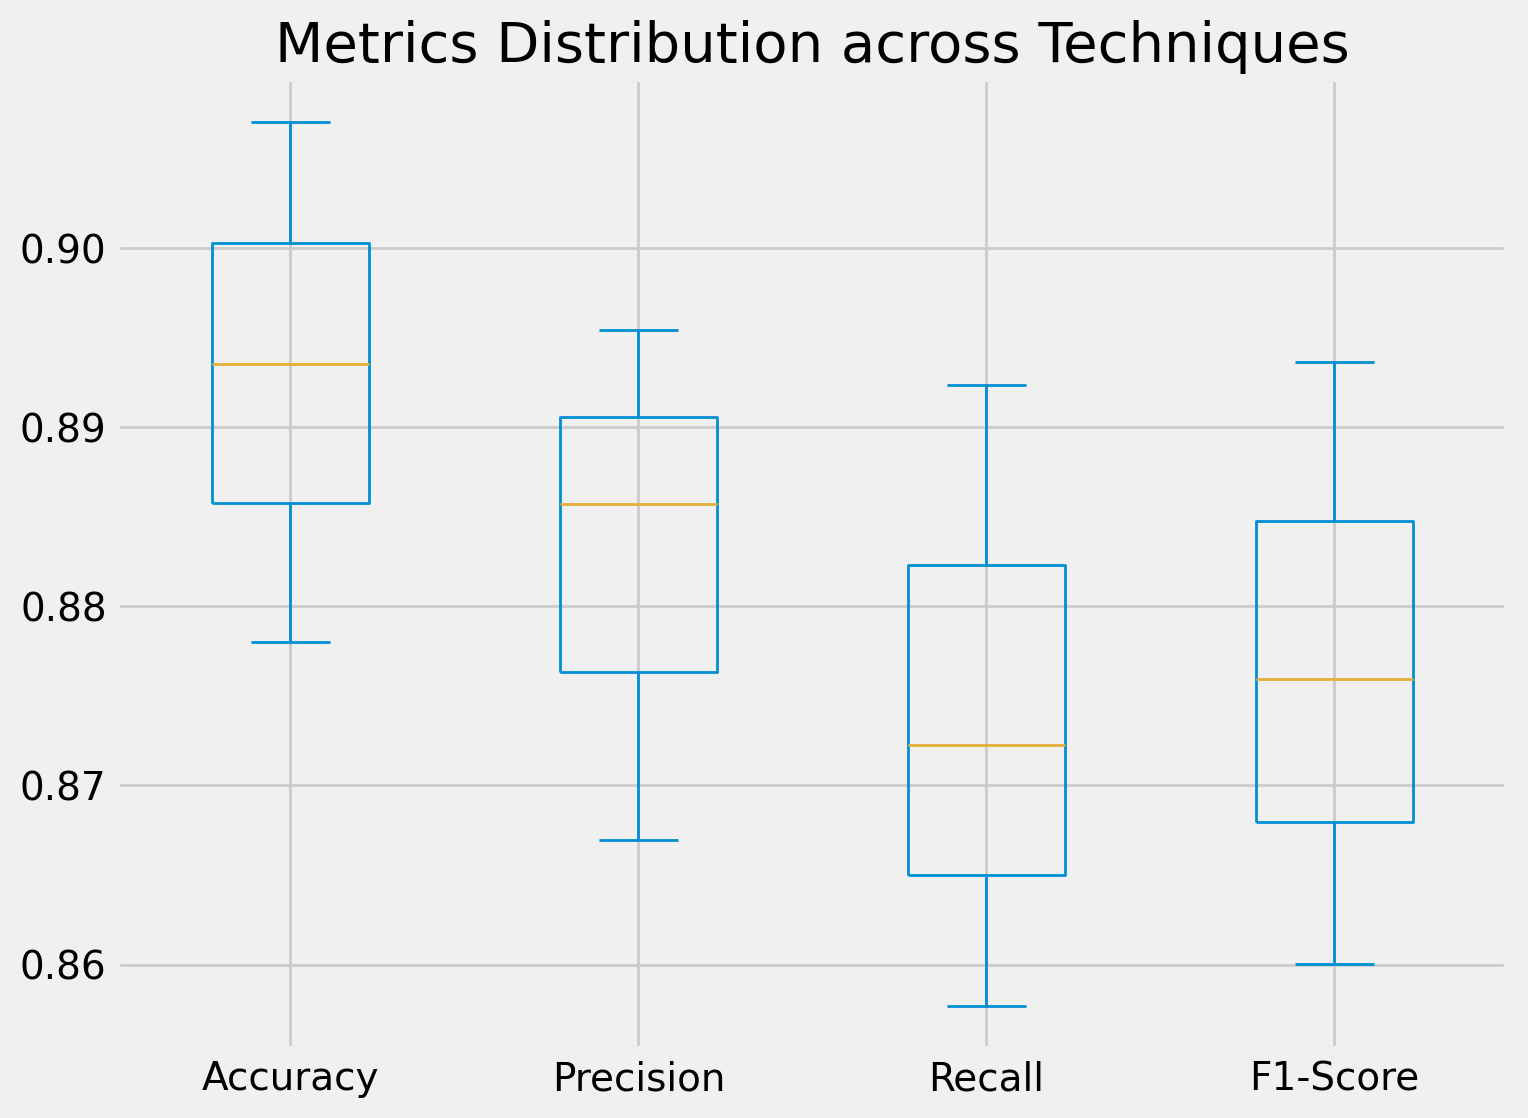

               None    Random     Bayes
Accuracy   0.907000  0.878000  0.893500
Precision  0.895401  0.866930  0.885709
Recall     0.892357  0.857679  0.872270
F1-Score   0.893609  0.860005  0.875950


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results_mlp, index=metrics)

results_df.T.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Performance Metrics across Techniques')
plt.ylabel('Score')
plt.grid(True)
plt.show()
print()

results_df.T.plot(kind='box', figsize=(8,6))
plt.title('Metrics Distribution across Techniques')
plt.grid(True)
plt.show()

print(results_df)